<a href="https://colab.research.google.com/github/danielscosta/mestrado/blob/master/disciplinas/Estudos_Especiais/notebook/FungusAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The candida.csv file contains thirty samples from raman's spectroscopy of two different kinds of candida fungus: 1 - Albicans and 0 - Glabrata. Each spectrum have 1024 features that represents light intensity by frequency.

The goal of this work is explore tecniques to choose significant features from spectrum and apply this features on a classifier for identify Candida Albicans and Candida Glabrata.

To load the file:

,Albicans/Glabrata,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,...,Feature 984,Feature 985,Feature 986,Feature 987,Feature 988,Feature 989,Feature 990,Feature 991,Feature 992,Feature 993,Feature 994,Feature 995,Feature 996,Feature 997,Feature 998,Feature 999,Feature 1000,Feature 1001,Feature 1002,Feature 1003,Feature 1004,Feature 1005,Feature 1006,Feature 1007,Feature 1008,Feature 1009,Feature 1010,Feature 1011,Feature 1012,Feature 1013,Feature 1014,Feature 1015,Feature 1016,Feature 1017,Feature 1018,Feature 1019,Feature 1020,Feature 1021,Feature 1022,Feature 1023
0,0.0,546.583,546.383,546.283,546.333,547.000,546.400,546.417,546.733,546.567,546.283,546.433,547.150,546.667,546.383,546.867,547.050,546.633,546.883,548.183,547.517,547.667,547.417,548.567,549.350,553.950,604.267,1250.17,1787.02,960.933,559.683,549.183,547.367,547.033,547.583,546.567,546.750,547.350,546.467,546.917,...,558.817,558.783,558.633,559.083,558.133,558.083,558.300,557.850,557.000,556.867,557.583,557.800,557.283,557.183,557.833,557.133,557.200,558.167,557.367,556.400,557.467,557.167,557.783,557.083,556.800,556.933,556.183,556.900,556.817,557.400,556.583,555.167,556.200,556.333,555.917,555.917,555.767,555.400,554.700,554.683
1,0.0,545.767,546.450,546.433,546.167,546.150,546.250,546.000,546.017,546.100,546.450,546.267,546.450,546.550,546.483,546.467,546.300,546.717,546.300,547.183,547.417,547.367,547.517,548.750,551.250,556.783,639.033,1790.10,2842.15,1359.500,569.600,550.333,547.600,546.467,547.150,547.000,546.533,546.767,547.083,546.083,...,565.500,565.383,565.383,565.267,564.667,564.767,565.200,565.717,563.567,565.667,565.117,564.117,564.367,563.783,563.367,563.517,564.133,564.050,566.150,563.283,562.433,563.317,563.433,563.333,562.783,562.633,562.967,563.167,563.300,563.117,562.667,561.800,562.700,562.117,562.667,562.483,561.617,561.967,561.800,560.417
2,0.0,546.217,546.233,546.633,546.050,546.367,546.417,546.500,546.383,546.200,546.150,546.483,546.183,547.083,546.283,546.333,546.350,546.250,547.400,547.117,547.150,547.700,548.217,549.483,551.833,557.850,637.783,1729.32,2674.87,1304.250,568.833,550.783,547.817,547.817,547.100,546.467,546.900,546.300,546.650,546.667,...,558.750,558.850,558.583,558.117,558.267,559.550,558.900,558.633,557.800,558.817,559.250,558.200,557.867,558.133,558.383,557.050,557.867,558.400,557.867,557.233,557.567,558.133,557.400,557.117,557.417,558.350,558.017,557.033,557.100,557.483,556.617,556.800,557.500,557.083,556.783,557.233,556.383,555.850,556.517,555.517
3,0.0,545.000,544.400,545.200,544.417,544.650,544.433,544.500,545.183,545.317,544.967,544.750,544.783,544.850,545.067,544.800,544.883,545.017,544.650,545.800,545.450,545.950,546.400,547.150,549.217,554.250,609.800,1279.13,1998.45,1031.180,560.633,548.117,546.583,545.517,544.967,545.100,545.417,545.183,543.983,544.683,...,566.600,565.733,566.433,565.917,565.450,565.867,565.817,566.000,565.067,565.950,565.950,565.233,566.067,565.100,565.150,564.617,565.683,565.533,565.817,565.233,564.983,564.933,565.283,564.450,564.850,564.317,564.367,564.700,564.683,565.033,563.600,564.367,564.333,562.417,562.883,563.850,563.367,562.667,562.033,562.817
4,0.0,546.700,546.750,546.517,546.583,547.000,546.250,546.683,547.017,547.367,546.417,546.650,547.267,546.933,546.833,546.717,546.717,546.883,547.333,547.400,548.033,548.350,549.067,549.483,551.967,558.467,629.617,1563.25,2617.50,1328.720,573.633,550.500,548.783,547.717,548.067,547.250,546.833,547.817,546.867,546.817,...,562.217,561.567,562.550,562.183,562.800,563.133,562.450,562.483,562.750,563.000,562.583,562.700,562.817,561.883,562.917,561.633,561.617,563.217,563.000,562.417,

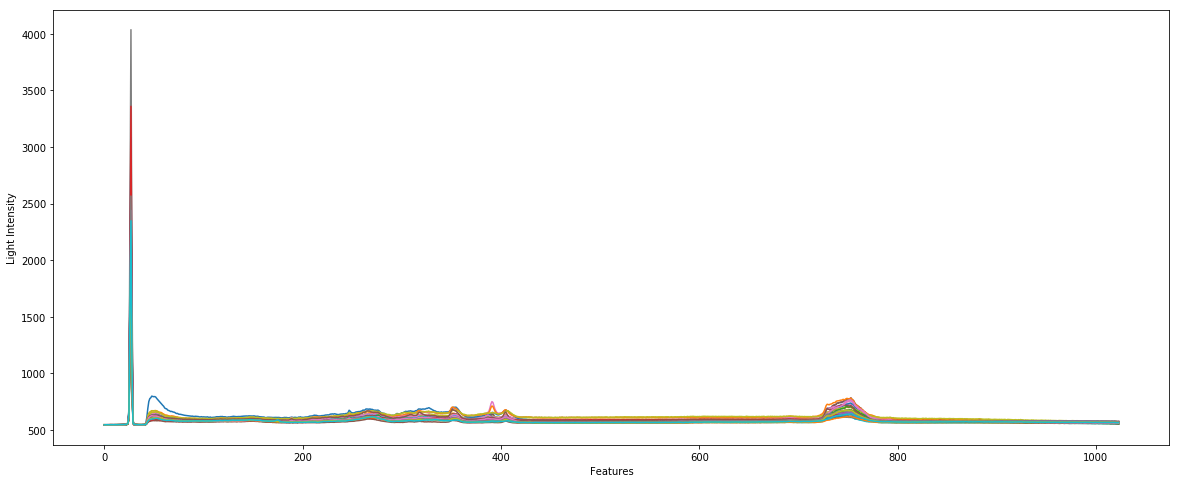

In [24]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/danielscosta/mestrado/master/disciplinas/Estudos_Especiais/raman-spectroscopy-of-candida-fungo/candida.csv')

display(df)

fig, ax = plt.subplots(figsize=(20, 8))
plt.xlabel('Features')
plt.ylabel('Light Intensity')
for i, (name, row) in enumerate(df.iterrows()):
  ax.plot(range(1024), row[1:])

Normalize dataframe:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.029060,0.029049,0.029044,0.029046,0.029082,0.029050,0.029051,0.029068,0.029059,0.029044,0.029052,0.029090,0.029064,0.029049,0.029075,0.029084,0.029062,0.029076,0.029145,0.029109,0.029117,0.029104,0.029165,0.029207,0.029451,0.032126,0.066467,0.095009,0.051089,0.029756,0.029198,0.029101,0.029084,0.029113,0.029059,0.029069,0.029100,0.029053,0.029077,0.029097,...,0.029710,0.029708,0.029700,0.029724,0.029674,0.029671,0.029683,0.029659,0.029613,0.029606,0.029644,0.029656,0.029629,0.029623,0.029658,0.029621,0.029624,0.029676,0.029633,0.029582,0.029638,0.029622,0.029655,0.029618,0.029603,0.029610,0.029570,0.029608,0.029604,0.029635,0.029591,0.029516,0.029571,0.029578,0.029556,0.029556,0.029548,0.029528,0.029491,0.029490
1,0.028418,0.028454,0.028453,0.028439,0.028438,0.028443,0.028430,0.028431,0.028436,0.028454,0.028444,0.028454,0.028459,0.028455,0.028455,0.028446,0.028468,0.028446,0.028492,0.028504,0.028502,0.028509,0.028574,0.028704,0.028992,0.033275,0.093211,0.147991,0.070789,0.029659,0.028656,0.028514,0.028455,0.028490,0.028482,0.028458,0.028470,0.028487,0.028435,0.028434,...,0.029446,0.029440,0.029440,0.029434,0.029402,0.029408,0.029430,0.029457,0.029345,0.029454,0.029426,0.029374,0.029387,0.029356,0.029335,0.029342,0.029375,0.029370,0.029480,0.029330,0.029286,0.029332,0.029338,0.029333,0.029304,0.029296,0.029314,0.029324,0.029331,0.029322,0.029298,0.029253,0.029300,0.029270,0.029298,0.029289,0.029244,0.029262,0.029253,0.029181
2,0.029185,0.029186,0.029208,0.029177,0.029193,0.029196,0.029201,0.029194,0.029185,0.029182,0.029200,0.029184,0.029232,0.029189,0.029192,0.029193,0.029187,0.029249,0.029234,0.029235,0.029265,0.029292,0.029360,0.029486,0.029807,0.034078,0.092401,0.142924,0.069689,0.030394,0.029429,0.029271,0.029271,0.029233,0.029199,0.029222,0.029190,0.029209,0.029210,0.029196,...,0.029855,0.029860,0.029846,0.029821,0.029829,0.029898,0.029863,0.029849,0.029804,0.029859,0.029882,0.029826,0.029808,0.029822,0.029836,0.029764,0.029808,0.029836,0.029808,0.029774,0.029792,0.029822,0.029783,0.029768,0.029784,0.029834,0.029816,0.029763,0.029767,0.029787,0.029741,0.029751,0.029788,0.029766,0.029750,0.029774,0.029729,0.029700,0.029736,0.029682
3,0.029065,0.029033,0.029075,0.029034,0.029046,0.029034,0.029038,0.029074,0.029082,0.029063,0.029051,0.029053,0.029057,0.029068,0.029054,0.029058,0.029066,0.029046,0.029107,0.029089,0.029115,0.029139,0.029179,0.029290,0.029558,0.032520,0.068216,0.106577,0.054993,0.029898,0.029231,0.029149,0.029092,0.029063,0.029070,0.029087,0.029074,0.029010,0.029048,0.029090,...,0.030217,0.030170,0.030208,0.030180,0.030155,0.030178,0.030175,0.030185,0.030135,0.030182,0.030182,0.030144,0.030188,0.030137,0.030139,0.030111,0.030168,0.030160,0.030175,0.030144,0.030130,0.030128,0.030146,0.030102,0.030123,0.030095,0.030098,0.030115,0.030114,0.030133,0.030057,0.030098,0.030096,0.029994,0.030018,0.030070,0.030044,0.030007,0.029973,0.030015
4,0.029146,0.029149,0.029137,0.029140,0.029162,0.029122,0.029145,0.029163,0.029182,0.029131,0.029144,0.029177,0.029159,0.029153,0.029147,0.029147,0.029156,0.029180,0.029184,0.029217,0.029234,0.029273,0.029295,0.029427,0.029774,0.033567,0.083342,0.139548,0.070838,0.030582,0.029349,0.029257,0.029201,0.029219,0.029176,0.029153,0.029206,0.029155,0.029153,0.029160,...,0.029974,0.029939,0.029991,0.029972,0.030005,0.030022,0.029986,0.029988,0.030002,0.030015,0.029993,0.029999,0.030006,0.029956,0.030011,0.029943,0.029942,0.030027,0.030015,0.029984,0.029947,0.029995,0.029987,0.029965,0.029970,0.029889,0.029928,0.029945,0.029932,0.029964,0.029881,0.029907,0.029920,0.029916,0.029901,0.029912,0.029892,0.029926,0.029857,0.029873
5,0.028338,0.028329,0.028359,0.028330,0.028317,0.028333,0.028346,0.0282

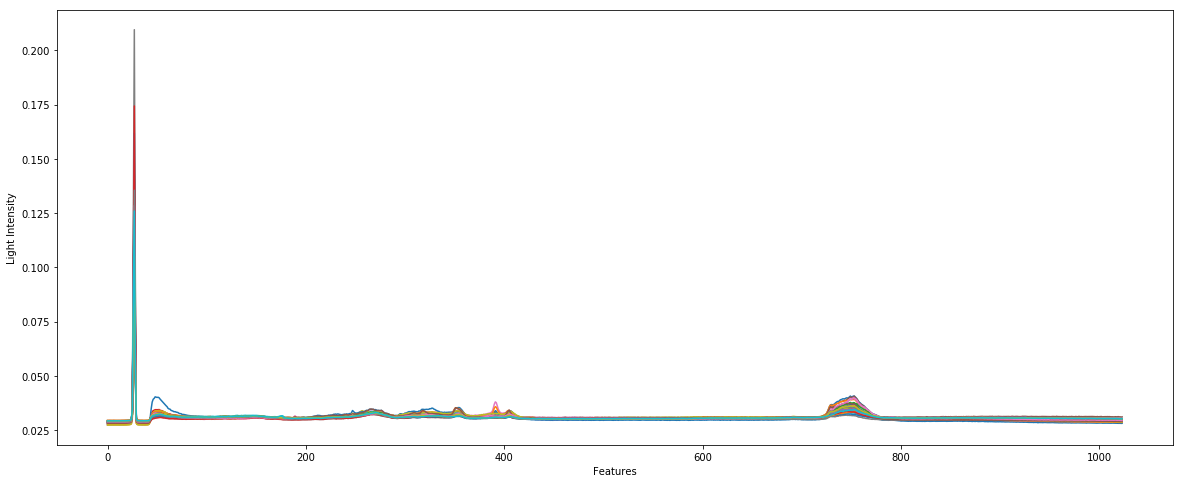

In [35]:
from sklearn.preprocessing import Normalizer
import numpy as np

df2 = pd.DataFrame(Normalizer().fit_transform(np.delete(df.values, [0], axis=1)))

display(df2)

fig, ax = plt.subplots(figsize=(20, 8))
plt.xlabel('Features')
plt.ylabel('Light Intensity')
for i, (name, row) in enumerate(df2.iterrows()):
  ax.plot(range(1024), row)

Remove baseline(based on https://stackoverflow.com/questions/57350711/baseline-correction-for-spectroscopic-data):

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.029047,0.029049,0.029051,0.029053,0.029055,0.029053,0.029047,0.029033,0.029009,0.028973,0.028924,0.028860,0.028781,0.028689,0.028588,0.028485,0.028392,0.028325,0.028306,0.028362,0.028530,0.028849,0.029368,0.030133,0.031161,0.032322,0.033215,0.033408,0.032745,0.031586,0.030442,0.029534,0.028887,0.028456,0.028201,0.028083,0.028074,0.028151,0.028303,0.028523,...,0.029691,0.029687,0.029681,0.029673,0.029663,0.029653,0.029641,0.029631,0.029622,0.029615,0.029612,0.029611,0.029611,0.029610,0.029610,0.029608,0.029606,0.029603,0.029600,0.029597,0.029595,0.029594,0.029593,0.029590,0.029586,0.029581,0.029575,0.029568,0.029560,0.029551,0.029543,0.029535,0.029529,0.029525,0.029520,0.029515,0.029509,0.029502,0.029495,0.029488
1,0.028426,0.028434,0.028441,0.028446,0.028448,0.028444,0.028432,0.028406,0.028364,0.028300,0.028212,0.028099,0.027958,0.027795,0.027614,0.027430,0.027262,0.027138,0.027095,0.027183,0.027462,0.028004,0.028890,0.030203,0.031979,0.034013,0.035631,0.036040,0.034925,0.032908,0.030906,0.029325,0.028212,0.027487,0.027071,0.026895,0.026900,0.027041,0.027285,0.027613,...,0.029407,0.029404,0.029401,0.029397,0.029392,0.029386,0.029379,0.029372,0.029365,0.029361,0.029357,0.029353,0.029349,0.029345,0.029340,0.029335,0.029331,0.029325,0.029318,0.029311,0.029305,0.029302,0.029300,0.029299,0.029298,0.029297,0.029294,0.029291,0.029286,0.029280,0.029273,0.029267,0.029261,0.029255,0.029248,0.029240,0.029229,0.029217,0.029203,0.029188
2,0.029186,0.029190,0.029193,0.029196,0.029197,0.029193,0.029181,0.029155,0.029113,0.029050,0.028965,0.028854,0.028718,0.028560,0.028387,0.028212,0.028053,0.027938,0.027903,0.027997,0.028277,0.028814,0.029683,0.030968,0.032696,0.034665,0.036211,0.036581,0.035486,0.033528,0.031589,0.030060,0.028985,0.028287,0.027889,0.027723,0.027732,0.027870,0.028106,0.028417,...,0.029834,0.029833,0.029831,0.029829,0.029827,0.029825,0.029822,0.029818,0.029814,0.029810,0.029806,0.029801,0.029795,0.029789,0.029784,0.029779,0.029777,0.029776,0.029776,0.029776,0.029776,0.029775,0.029774,0.029773,0.029772,0.029771,0.029768,0.029764,0.029760,0.029755,0.029750,0.029746,0.029742,0.029737,0.029731,0.029723,0.029714,0.029704,0.029694,0.029684
3,0.029037,0.029039,0.029041,0.029043,0.029044,0.029042,0.029035,0.029020,0.028993,0.028953,0.028896,0.028823,0.028733,0.028628,0.028513,0.028397,0.028293,0.028219,0.028200,0.028269,0.028464,0.028832,0.029425,0.030296,0.031462,0.032778,0.033799,0.034038,0.033297,0.031980,0.030673,0.029632,0.028885,0.028384,0.028083,0.027939,0.027921,0.028004,0.028176,0.028431,...,0.030168,0.030167,0.030165,0.030162,0.030159,0.030155,0.030151,0.030147,0.030143,0.030141,0.030138,0.030135,0.030132,0.030128,0.030125,0.030123,0.030123,0.030123,0.030123,0.030122,0.030120,0.030116,0.030112,0.030107,0.030102,0.030097,0.030091,0.030084,0.030075,0.030064,0.030052,0.030038,0.030025,0.030013,0.030004,0.029996,0.029989,0.029983,0.029977,0.029971
4,0.029147,0.029146,0.029146,0.029145,0.029143,0.029138,0.029126,0.029103,0.029065,0.029009,0.028930,0.028827,0.028701,0.028553,0.028391,0.028225,0.028075,0.027964,0.027929,0.028014,0.028273,0.028773,0.029586,0.030789,0.032415,0.034278,0.035777,0.036196,0.035215,0.033378,0.031524,0.030049,0.029006,0.028321,0.027923,0.027748,0.027741,0.027862,0.028080,0.028375,...,0.029957,0.029956,0.029958,0.029962,0.029967,0.029972,0.029976,0.029979,0.029979,0.029978,0.029975,0.029971,0.029966,0.029960,0.029955,0.029951,0.029949,0.029948,0.029948,0.029946,0.029942,0.029937,0.029931,0.029922,0.029914,0.029906,0.029901,0.029897,0.029894,0.029892,0.029890,0.029889,0.029888,0.029887,0.029884,0.029881,0.029876,0.029870,0.029863,0.029857
5,0.028336,0.028335,0.028335,0.028333,0.028330,0.028324,0.028312,0.0282

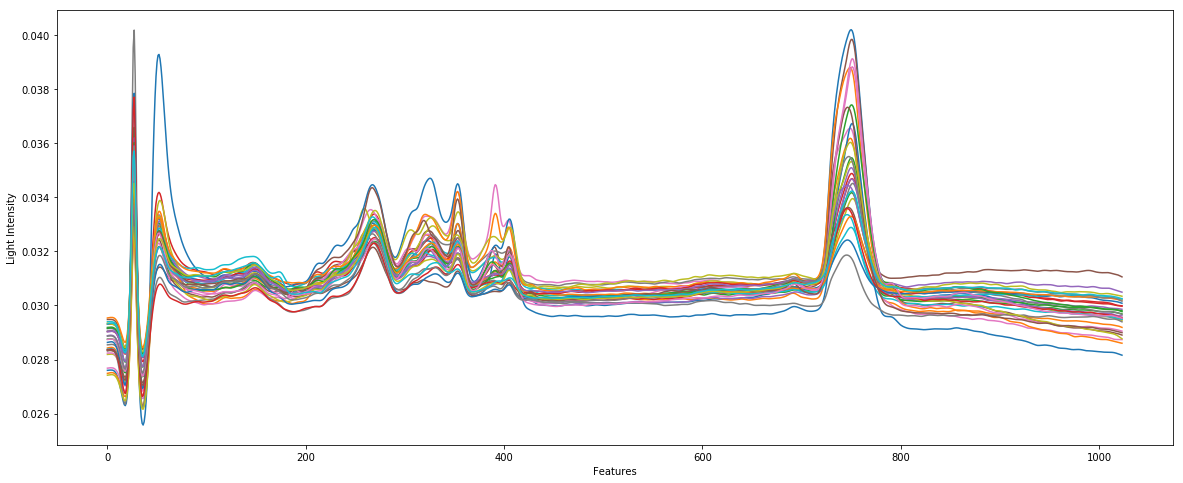

In [41]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_correction(raman_spectra, lam = 6, p = 0.05, niter=10):
    #according to "Asymmetric Least Squares Smoothing" by P. Eilers and H. Boelens
    number_of_spectra = raman_spectra.index.size

    #this is the code for the fitting procedure        
    L = len(raman_spectra.columns)
    w = np.ones(raman_spectra.shape[0]*raman_spectra.shape[1])

    D = sparse.block_diag(np.tile(sparse.diags([1,-2,1],[0,-1,-2],shape=(L,L-2)),number_of_spectra),format='csr')

    raman_spectra_flattened = raman_spectra.values.ravel()

    for jj in range(int(niter)):
        W = sparse.diags(w,format='csr')
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z,w*raman_spectra_flattened,permc_spec='NATURAL')
        w = p * (raman_spectra_flattened > z) + (1-p) * (raman_spectra_flattened < z)
    #end of fitting procedure

    return pd.DataFrame(z.reshape(number_of_spectra,-1),index=raman_spectra.index,columns=raman_spectra.columns)

df3 = baseline_correction(df2)

display(df3)

fig, ax = plt.subplots(figsize=(20, 8))
plt.xlabel('Features')
plt.ylabel('Light Intensity')
for i, (name, row) in enumerate(df3.iterrows()):
  ax.plot(range(1024), row)

Now, the samples will be separate in training and test bases. After that, will be submit to Feature Selection algorithm for select principal features. Finally, the features selected will be used in KNN classifier to separed the fungus classes.

In [93]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier

TRAIN_SIZE = 0.8

def get_data():    
  
    data = df.values
    aux_data = df3.values

    albicans_data = np.array([aux_data[i] for i, d in enumerate(data) if d[0] == 1])
    glabrata_data = np.array([aux_data[i] for i, d in enumerate(data) if d[0] == 0])

    np.random.shuffle(albicans_data)
    np.random.shuffle(glabrata_data)
    
    x_data_training = np.concatenate((albicans_data[:int(len(albicans_data)*TRAIN_SIZE)], glabrata_data[:int(len(glabrata_data)*TRAIN_SIZE)]))
    y_data_training = np.concatenate((np.array([1 for i in range(int(len(albicans_data)*TRAIN_SIZE))]), np.array([0 for i in range(int(len(glabrata_data)*TRAIN_SIZE))])))
   
    x_data_test = np.concatenate((albicans_data[int(len(albicans_data)*TRAIN_SIZE):], glabrata_data[int(len(glabrata_data)*TRAIN_SIZE):]))
    y_data_test = np.concatenate((np.array([1 for i in range(len(albicans_data) - int(len(albicans_data)*TRAIN_SIZE))]), np.array([0 for i in range(len(albicans_data) - int(len(albicans_data)*TRAIN_SIZE))])))
    
    return x_data_training, y_data_training, x_data_test, y_data_test

  
x_train, y_train, x_test, y_test = get_data()

sfs = SFS(KNeighborsClassifier(n_neighbors=5), 
          k_features=3,       
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=0)

sfs = sfs.fit(x_train, y_train)

print('Sequential Floating Forward Selection: 3')
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols) 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train[:, feat_cols], y_train)

y_train_pred = knn.predict(x_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = knn.predict(x_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))  
  

Sequential Floating Forward Selection: 3
[60, 178, 180]
Training accuracy on selected features: 0.917
Testing accuracy on selected features: 0.667
[[2 1]
 [1 2]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6

